In [1]:
import pandas as pd
import os
import numpy as np


def combine_directory_parquets(directory_path):
    '''
    Combines all parquet files in a directory into a single dataframe.
    '''
    # If path does not end in a slash, add one
    if directory_path[-1] != '/':
        directory_path += '/'
    # list of files in directory
    file_list = [f for f in os.listdir(directory_path) if f.endswith('.parquet')]
    # read in all parquet files
    combined_df = pd.concat([pd.read_parquet(directory_path + f) for f in file_list])
    # Return combined dataframe
    return combined_df


#### Reading the LBP Features from All feature parquets and Plotting for Training data.

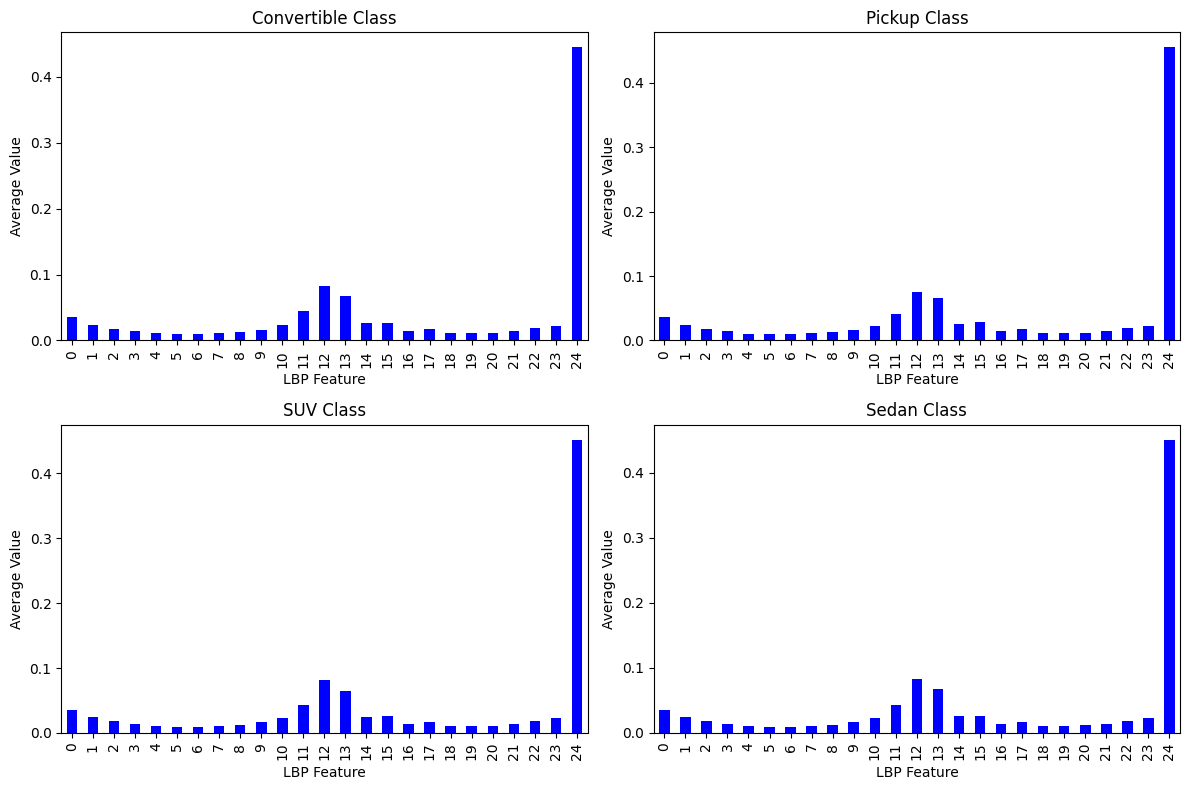

In [78]:
training_data = combine_directory_parquets('../../../Data/Features/All Features/train')
lbp_columns = training_data.filter(regex='LBP', axis=1)
class_column = training_data[['Class']]

# Concatenate the lbp columns and the Class column
filtered_data = pd.concat([class_column, lbp_columns], axis=1)

import matplotlib.pyplot as plt

mean_lbp_per_class = filtered_data.groupby('Class').mean()
lbp_indices = [int(col.split('_')[1]) for col in mean_lbp_per_class.columns]

# Plot histograms for each class as subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for i, (class_label, class_data) in enumerate(mean_lbp_per_class.iterrows()):
    row = i // 2
    col = i % 2
    class_data.plot(kind='bar', ax=axes[row, col], title=f'{class_label} Class', color='blue')
    axes[row, col].set_xlabel('LBP Feature')
    axes[row, col].set_ylabel('Average Value')
    axes[row, col].set_xticks(range(len(lbp_indices)))
    axes[row, col].set_xticklabels(lbp_indices)

plt.tight_layout()
plt.show()

#### Reading the LBP Features from All feature parquets and Plotting for Test data.

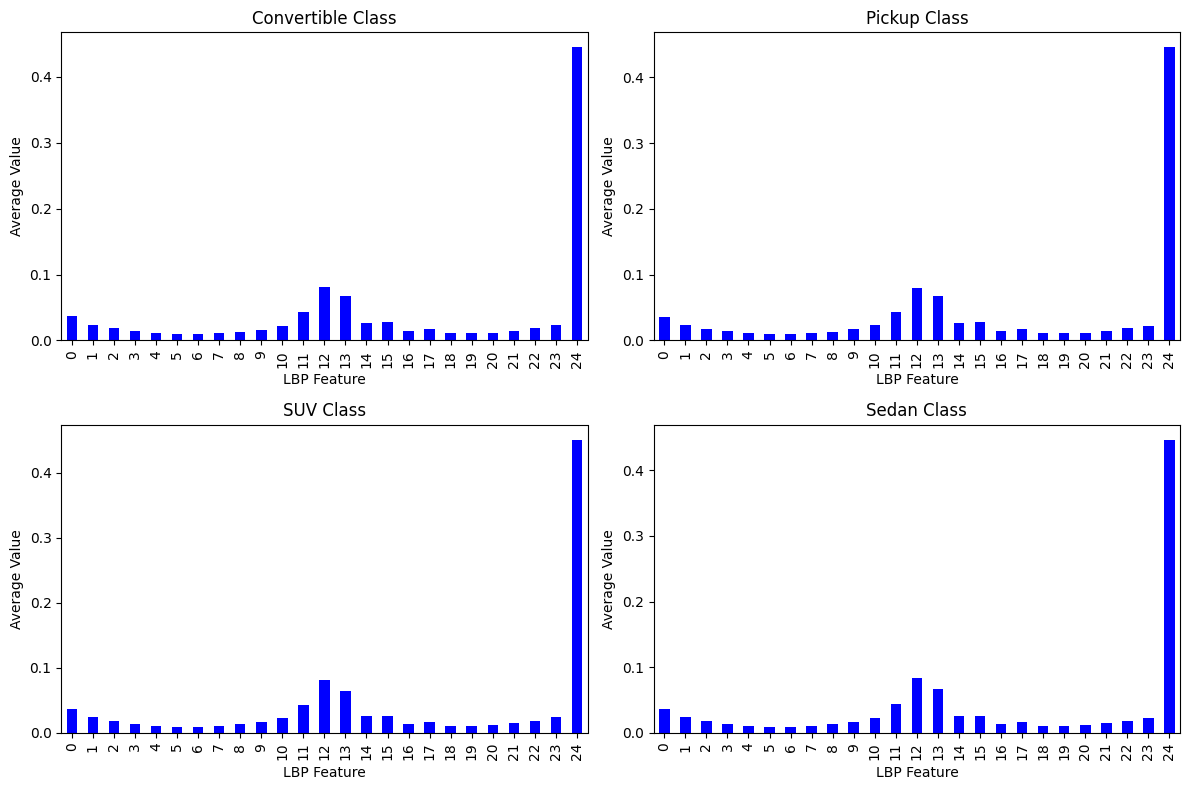

In [77]:
test_data = combine_directory_parquets('../../../Data/Features/All Features/test')
lbp_columns = test_data.filter(regex='LBP', axis=1)
class_column = test_data [['Class']]

# Concatenate the lbp columns and the Class column
filtered_data = pd.concat([class_column, lbp_columns], axis=1)

import matplotlib.pyplot as plt

mean_lbp_per_class = filtered_data.groupby('Class').mean()
lbp_indices = [int(col.split('_')[1]) for col in mean_lbp_per_class.columns]

# Plot histograms for each class as subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for i, (class_label, class_data) in enumerate(mean_lbp_per_class.iterrows()):
    row = i // 2
    col = i % 2
    class_data.plot(kind='bar', ax=axes[row, col], title=f'{class_label} Class', color='blue')
    axes[row, col].set_xlabel('LBP Feature')
    axes[row, col].set_ylabel('Average Value')
    axes[row, col].set_xticks(range(len(lbp_indices)))
    axes[row, col].set_xticklabels(lbp_indices)

plt.tight_layout()
plt.show()